



Epoch 1/25


500/500 [==============================] - 63s 122ms/step - loss: 2.1470 - accuracy: 0.2033 - val_loss: 1.6672 - val_accuracy: 0.4988
Epoch 2/25
500/500 [==============================] - 58s 116ms/step - loss: 1.6673 - accuracy: 0.4087 - val_loss: 1.0969 - val_accuracy: 0.6317
Epoch 3/25
500/500 [==============================] - 46s 92ms/step - loss: 1.2044 - accuracy: 0.5674 - val_loss: 0.8425 - val_accuracy: 0.7023
Epoch 4/25
500/500 [==============================] - 57s 114ms/step - loss: 0.8814 - accuracy: 0.6835 - val_loss: 0.2971 - val_accuracy: 0.9087
Epoch 5/25
500/500 [==============================] - 55s 110ms/step - loss: 0.6885 - accuracy: 0.7502 - val_loss: 0.2740 - val_accuracy: 0.9218
Epoch 6/25
500/500 [==============================] - 55s 110ms/step - loss: 0.5792 - accuracy: 0.7911 - val_loss: 0.1614 - val_accuracy: 0.9515
Epoch 7/25
500/500 [==============================] - 62s 123ms/step - loss: 0.4967 - accuracy: 0.8242 - val_loss: 0.1866 - v

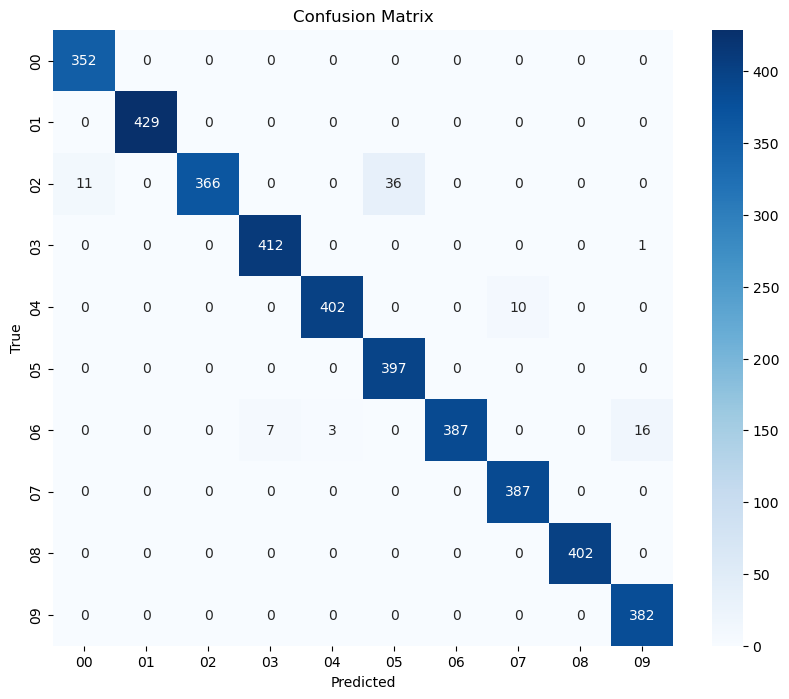

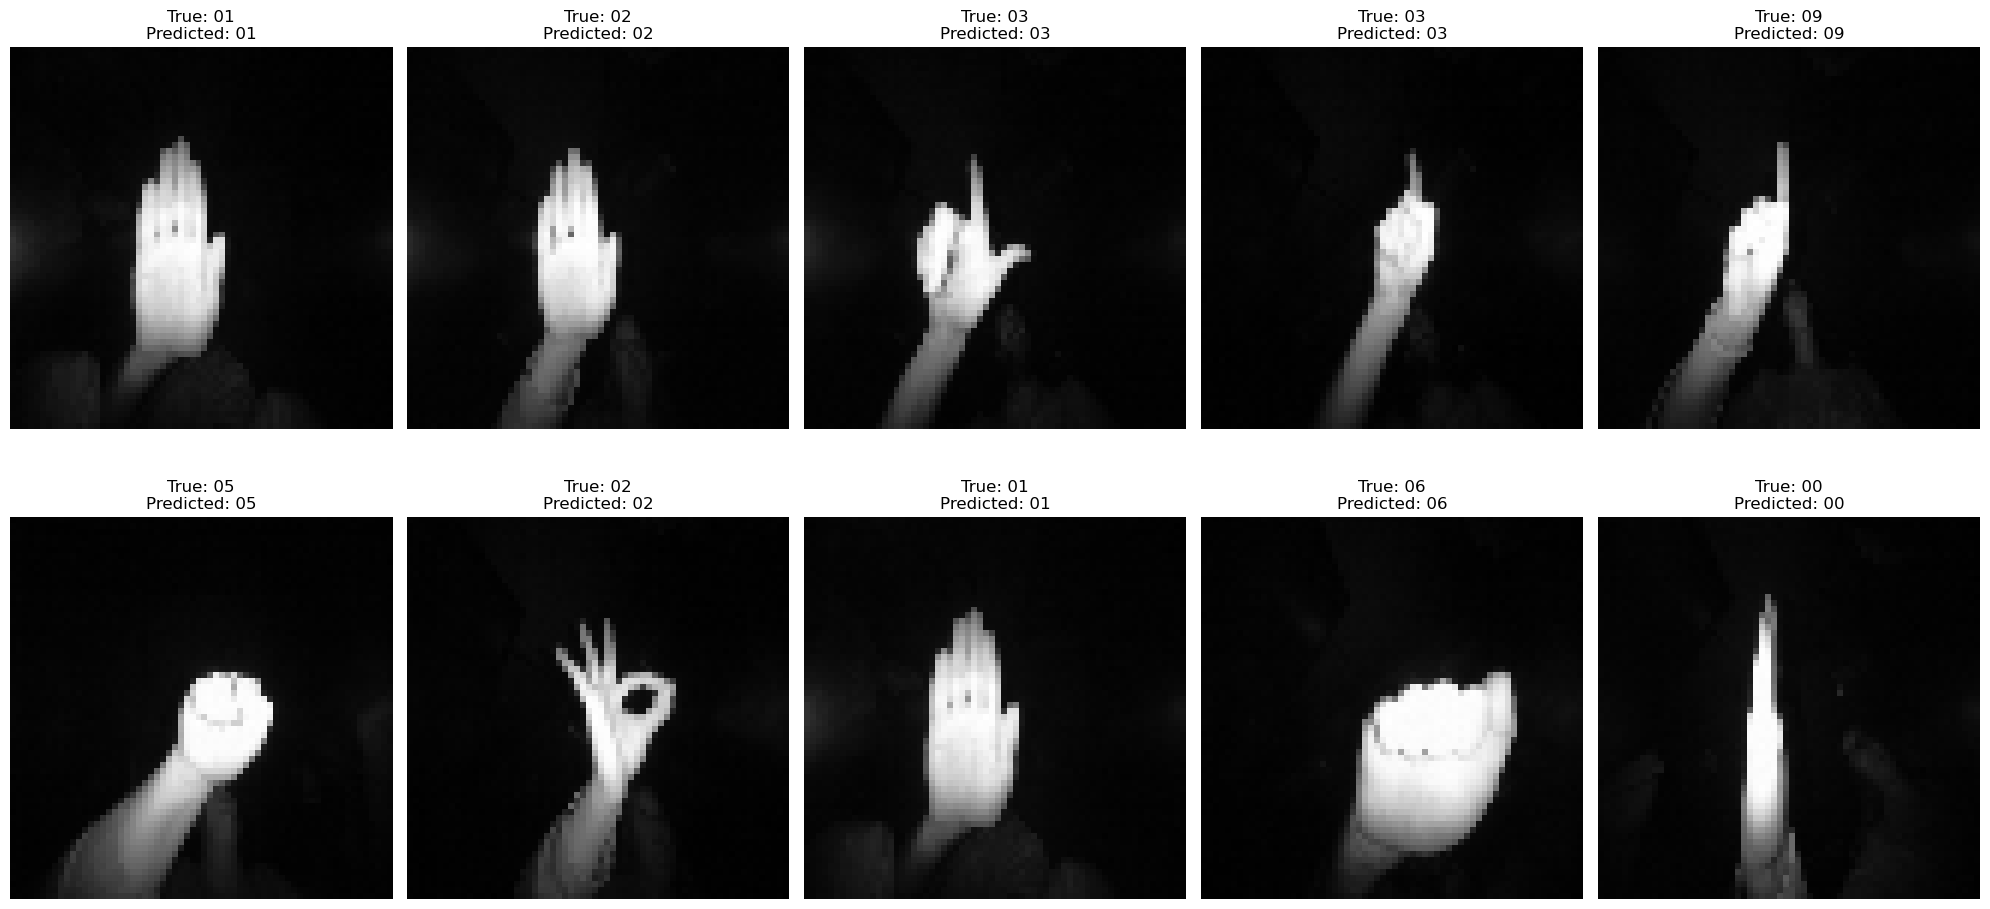

In [3]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import random

# Define paths
dataset_path = "D:\\Gesture"
gesture_folders = ["00", "01", "02", "03", "04", "05", "06", "07", "08", "09"]

# Load dataset
images = []
labels = []

for gesture_index, gesture_folder in enumerate(gesture_folders):
    gesture_path = os.path.join(dataset_path, gesture_folder)
    for gesture_class in os.listdir(gesture_path):
        gesture_class_path = os.path.join(gesture_path, gesture_class)
        for img_name in os.listdir(gesture_class_path):
            img_path = os.path.join(gesture_class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (64, 64))  # Resize to a fixed size
            images.append(img)
            labels.append(gesture_index)

# Convert to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Preprocessing
# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Add a channel dimension
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=25, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.sum(predicted_classes == true_classes) / len(true_classes)
print(f'Prediction accuracy: {accuracy * 100:.2f}%')

# Plot confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=gesture_folders, yticklabels=gesture_folders)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display random images with their true and predicted labels
num_images_to_display = 10
random_indices = random.sample(range(X_test.shape[0]), num_images_to_display)

plt.figure(figsize=(20, 10))
for i, idx in enumerate(random_indices):
    img = X_test[idx].squeeze()  # Remove channel dimension for plotting
    true_label = gesture_folders[true_classes[idx]]
    predicted_label = gesture_folders[predicted_classes[idx]]

    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}\nPredicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [4]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(true_classes, predicted_classes, average='weighted')

# Calculate recall
recall = recall_score(true_classes, predicted_classes, average='weighted')

# Calculate F1-score
f1 = f1_score(true_classes, predicted_classes, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precision: 0.9800877479210519
Recall: 0.979
F1-score: 0.9788117360507376
